Import the libaries for the data analysis.

In [1]:
#Uncomment the following lines if you are running this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats as stats




Use ETL method import the dataset and transform to a dataframe. 

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


To summarize the distribution of the median value of owner-occupied homes in Boston, we generate a bloxplot.

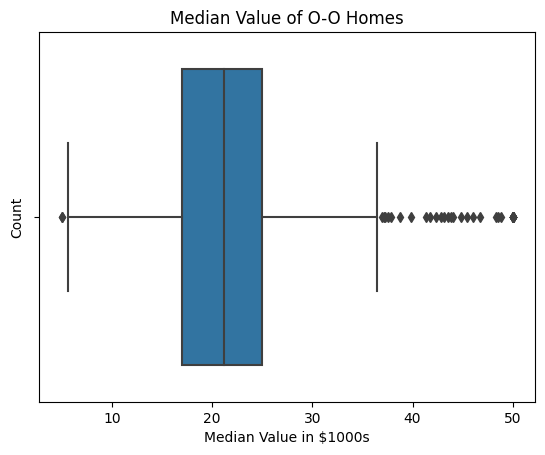

In [5]:

sns.boxplot(x=boston_df['MEDV'])
#generate title and labels
plt.title('Median Value of O-O Homes')
plt.xlabel('Median Value in $1000s')
plt.ylabel('Count')
plt.show()



"The box plot provides information about the distribution of the dataset, including the median value and the range of values that contains the middle 50% of the data."

Next, we observe the difference in median value for owner-occupied homes on/off the Charles River.  

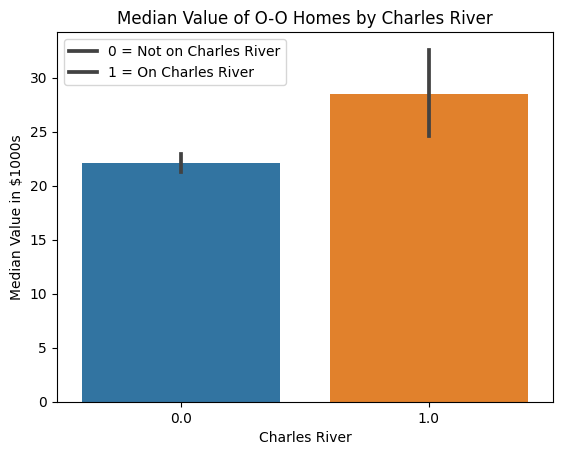

In [68]:
#generate a bar plot in of the CHAS column, with a legend 1= ' On Charles River' and 0= 'Not on Charles River'
sns.barplot(x=boston_df['CHAS'], y=boston_df['MEDV'])
plt.title('Median Value of O-O Homes by Charles River')
plt.xlabel('Charles River')
plt.ylabel('Median Value in $1000s')
plt.legend(['0 = Not on Charles River', '1 = On Charles River'])
plt.show()

Due to the variability in the bar plot, it appears that homes located on the Charles River have a higher median value of $23,000, compared to homes located off the river which have a median value of approximately $17,000.

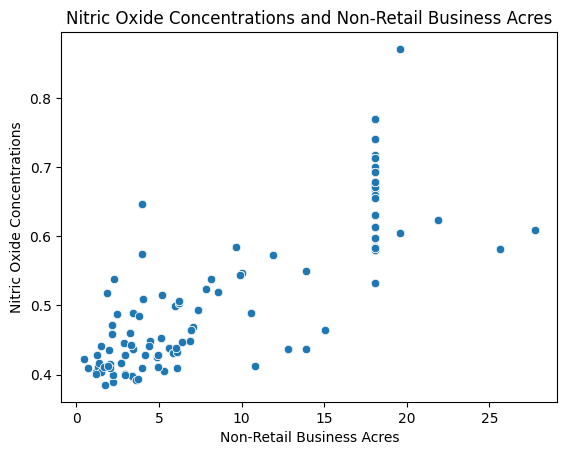

In [74]:
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations')
plt.xlabel('Non-Retail Business Acres')
plt.show()


We are examining the relationship between the concentration of Nitric Oxide and the amount of non-retail business land in acres. The data suggests a strong positive correlation between these two variables, with a noticeable upward trend.

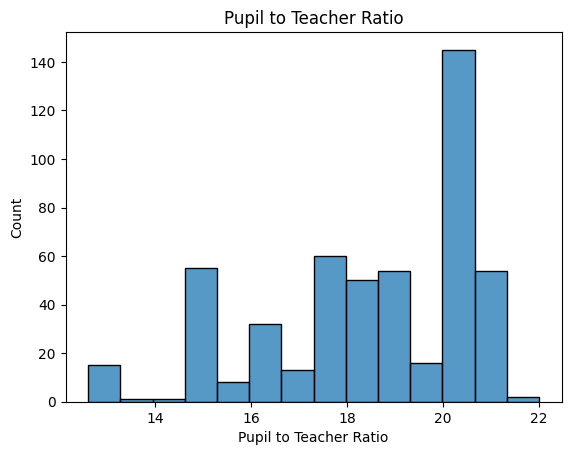

In [75]:
#create a histogram for the pupil to teacher ratio column
sns.histplot(x=boston_df['PTRATIO'])
plt.title('Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Count')
plt.show()


The histogram represents the distribution of the number of students per teacher in the dataset. The majority of the data falls within a range of approximately +/- 18 students per teacher, indicating a relatively consistent student-teacher ratio across most districts. However, some outliers have much higher ratios.

Next, we perform a hypothesis test using the z-test. We state the null hypothesis that there is no significant difference in the median value of houses that border the Charles River and the median value of houses that do not border the Charles River.

In [1]:

# z-test to test the hypothesis
#set alpha
alpha = 0.05
#set the sample size
n = 506
#set the sample mean value in (000's)
x_bar = 22.093842
#set the population mean value in (000's)
mu = 22.532806
#set the standard deviation
sigma = 9.188011
#calculate the z-score
z = (x_bar - mu)/(sigma/np.sqrt(n))
print(z)
#calculate the p-value
p = stats.norm.sf(abs(z))
print(p)
#compare the p-value to the alpha
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


NameError: name 'np' is not defined

Putting it all together, with an alpha level of 0.05 and a p-value of 0.1412570765975396, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the sample mean is significantly different from the population mean at the 5% significance level.

In [87]:
#import libs for pearson correlation
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm


In [88]:
x = boston_df['INDUS']
y = boston_df['NOX']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           7.91e-98
Time:                        15:11:08   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 


No, we cannot conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS) based on the data above. The OLS regression results show that the coefficient for INDUS is statistically significant (p-value < 0.05), which suggests that there is a relationship between INDUS and NOX. Specifically, the coefficient of 0.0129 indicates that a one-unit increase in INDUS is associated with a 0.0129 unit increase in NOX, holding all other variables constant.

However, it's important to note that the strength of the relationship is moderate (R-squared = 0.583), and there may be other factors that also influence NOX. Therefore, further analysis and investigation may be necessary to fully understand the relationship between these variables.

Notebook created by Kadeem Pratt